In [1]:
import pandas as pd

In [2]:
import scanpy as sc

from warnings import filterwarnings
filterwarnings('ignore')

sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.2 scipy==1.9.1 pandas==1.5.0 scikit-learn==1.1.2 statsmodels==0.13.5 pynndescent==0.5.8


In [3]:
adata = sc.read_h5ad('../data/sc_training.h5ad')
adata

AnnData object with n_obs × n_vars = 28697 × 15077
    obs: 'gRNA_maxID', 'state', 'condition', 'lane'
    layers: 'rawcounts'

In [4]:
adata.X

<28697x15077 sparse matrix of type '<class 'numpy.float32'>'
	with 80497219 stored elements in Compressed Sparse Row format>

In [5]:
df = pd.DataFrame(adata.X.toarray(), columns=adata.var_names, index=adata.obs_names)

# merge df with adata.obs
df = pd.concat([adata.obs, df], axis=1)

In [6]:
df

,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Slc3a1,Cfap53,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot
053l1_AAACCTGAGATGTCGG-1,ONE-NON-GENE-SITE-7,terminal exhausted,Unperturbed,lane1,0.511520,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGCAACGGT-1,Tox2-3,effector,Tox2,lane1,0.484165,0.484165,0.808991,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGTACGACG-1,Tpt1-2,effector,Tpt1,lane1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGTCGTTTG-1,Tox2-3,terminal exhausted,Tox2,lane1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGTGAAGAG-1,Tcf7-2,effector,Tcf7,lane1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCATCAGGTTCA-1,Tox2-3,other,Tox2,lane4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l4_TTTGTCATCAGTGTTG-1,Dvl2-3,cycling,Dvl2,lane4,0.530879,0.300263,0.875825,0.300263,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l4_TTTGTCATCCTCGCAT-1,Zeb2-2,cycling,Zeb2,lane4,0.000000,0.000000,0.000000,0.515672,0.515672,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l4_TTTGTCATCTTCAACT-1,Sox4-3,cycling,Sox4,lane4,0.383328,0.000000,0.383328,0.000000,0.383328,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
# calculate the mean of each gene for condition "Unperturbed"
unperturbed_mean = pd.DataFrame(df[df['condition'] == 'Unperturbed'].mean(axis=0), columns=['unperturbed_mean'])
unperturbed_mean.reset_index(inplace=True)

In [136]:
# calculate the mean of each condition
condition_mean = []
for condition in df['condition'].unique():
    if condition == 'Unperturbed':
        continue
    try:
        condition_mean.append([condition, df[df['condition'] == condition][condition].mean()])
    except:
        pass
condition_mean = pd.DataFrame(condition_mean, columns=['gene', 'perturbed_mean'])

In [137]:
effect = condition_mean.merge(unperturbed_mean, left_on='gene', right_on='index', how='left')
effect.drop(['index'], axis=1, inplace=True)

# calculate effect
effect['effect'] = effect['perturbed_mean'] - effect['unperturbed_mean']

# calculate relative effect
effect['rel_effect'] = effect['effect'] / effect['unperturbed_mean']

In [138]:
effect.loc[effect['gene'] == 'Tox2']

,gene,perturbed_mean,unperturbed_mean,effect,rel_effect
0,Tox2,0.000449,0.003892,-0.003443,-0.884671


In [139]:
effect.describe()

,perturbed_mean,unperturbed_mean,effect,rel_effect
count,64.000000,64.000000,64.000000,63.000000
mean,0.294313,0.422421,-0.128108,-0.155324
std,0.439542,0.635425,0.252050,1.147777
min,0.000000,0.000000,-1.190472,-1.000000
25%,0.051511,0.056603,-0.123313,-0.515721
50%,0.157988,0.202545,-0.051039,-0.319946
75%,0.339338,0.408598,-0.000405,-0.041064
max,2.137093,3.142533,0.181518,8.085995


<AxesSubplot:>

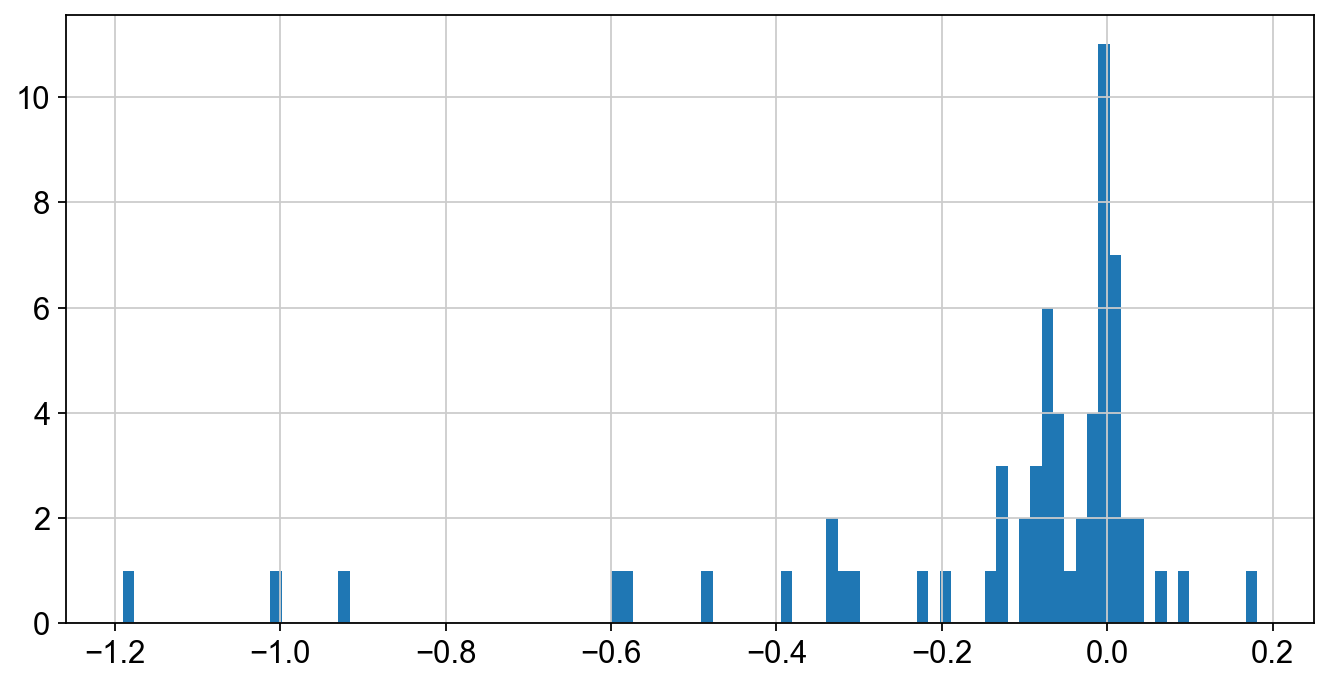

In [147]:
# distribution of absolute effect
effect['effect'].hist(bins=100, figsize=(10, 5))

<AxesSubplot:>

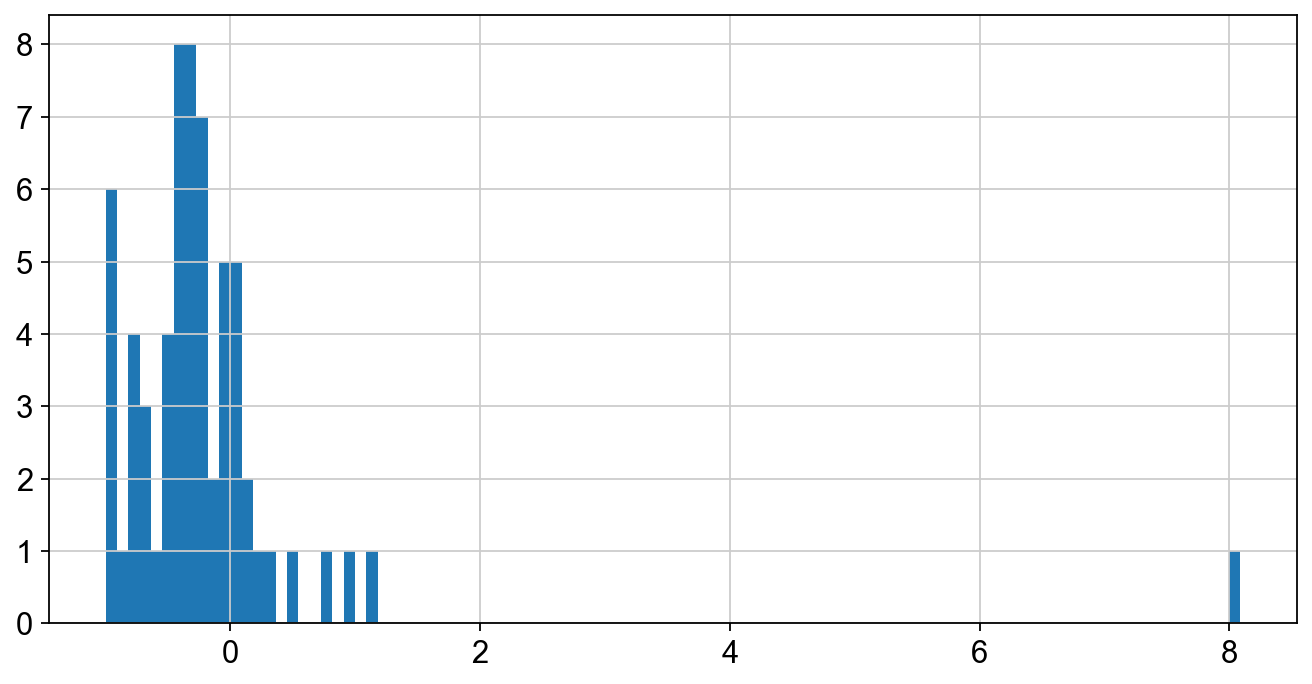

In [141]:
# distribution of relative effect
effect['rel_effect'].hist(bins=100, figsize=(10, 5))

In [142]:
effect.sort_values('rel_effect', ascending=False).head(10)

,gene,perturbed_mean,unperturbed_mean,effect,rel_effect
42,Id3,0.071398,0.007858,0.063540,8.085995
38,Lef1,0.061662,0.028740,0.032922,1.145539
59,Myb,0.196600,0.099169,0.097431,0.982483
36,Egr1,0.404271,0.222753,0.181518,0.814885
24,Dvl3,0.046734,0.031543,0.015191,0.481585
2,Tcf7,0.053104,0.039141,0.013963,0.356725
41,Foxp1,0.179817,0.144424,0.035393,0.245060
33,Prdm1,0.063048,0.053430,0.009618,0.180020
50,Sp140,0.223248,0.196863,0.026385,0.134027
61,Batf,0.330519,0.304884,0.025635,0.084081


In [143]:
df[df['condition'] == 'Id3']["Id3"].describe()

count    46.000000
mean      0.071398
std       0.301299
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.600853
Name: Id3, dtype: float64

In [144]:
df[df['condition'] == 'Unperturbed']["Id3"].describe()

count    4978.000000
mean        0.007858
std         0.078080
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.776099
Name: Id3, dtype: float64

In [145]:
df["condition"].value_counts().loc[['Unperturbed', 'Id3']]

Unperturbed    4978
Id3              46
Name: condition, dtype: int64

In [146]:
df[df["condition"] != "Unperturbed"]["condition"].value_counts().describe()

count      67.000000
mean      354.014925
std       659.373428
min         0.000000
25%        40.000000
50%       134.000000
75%       376.000000
max      4333.000000
Name: condition, dtype: float64

<AxesSubplot:>

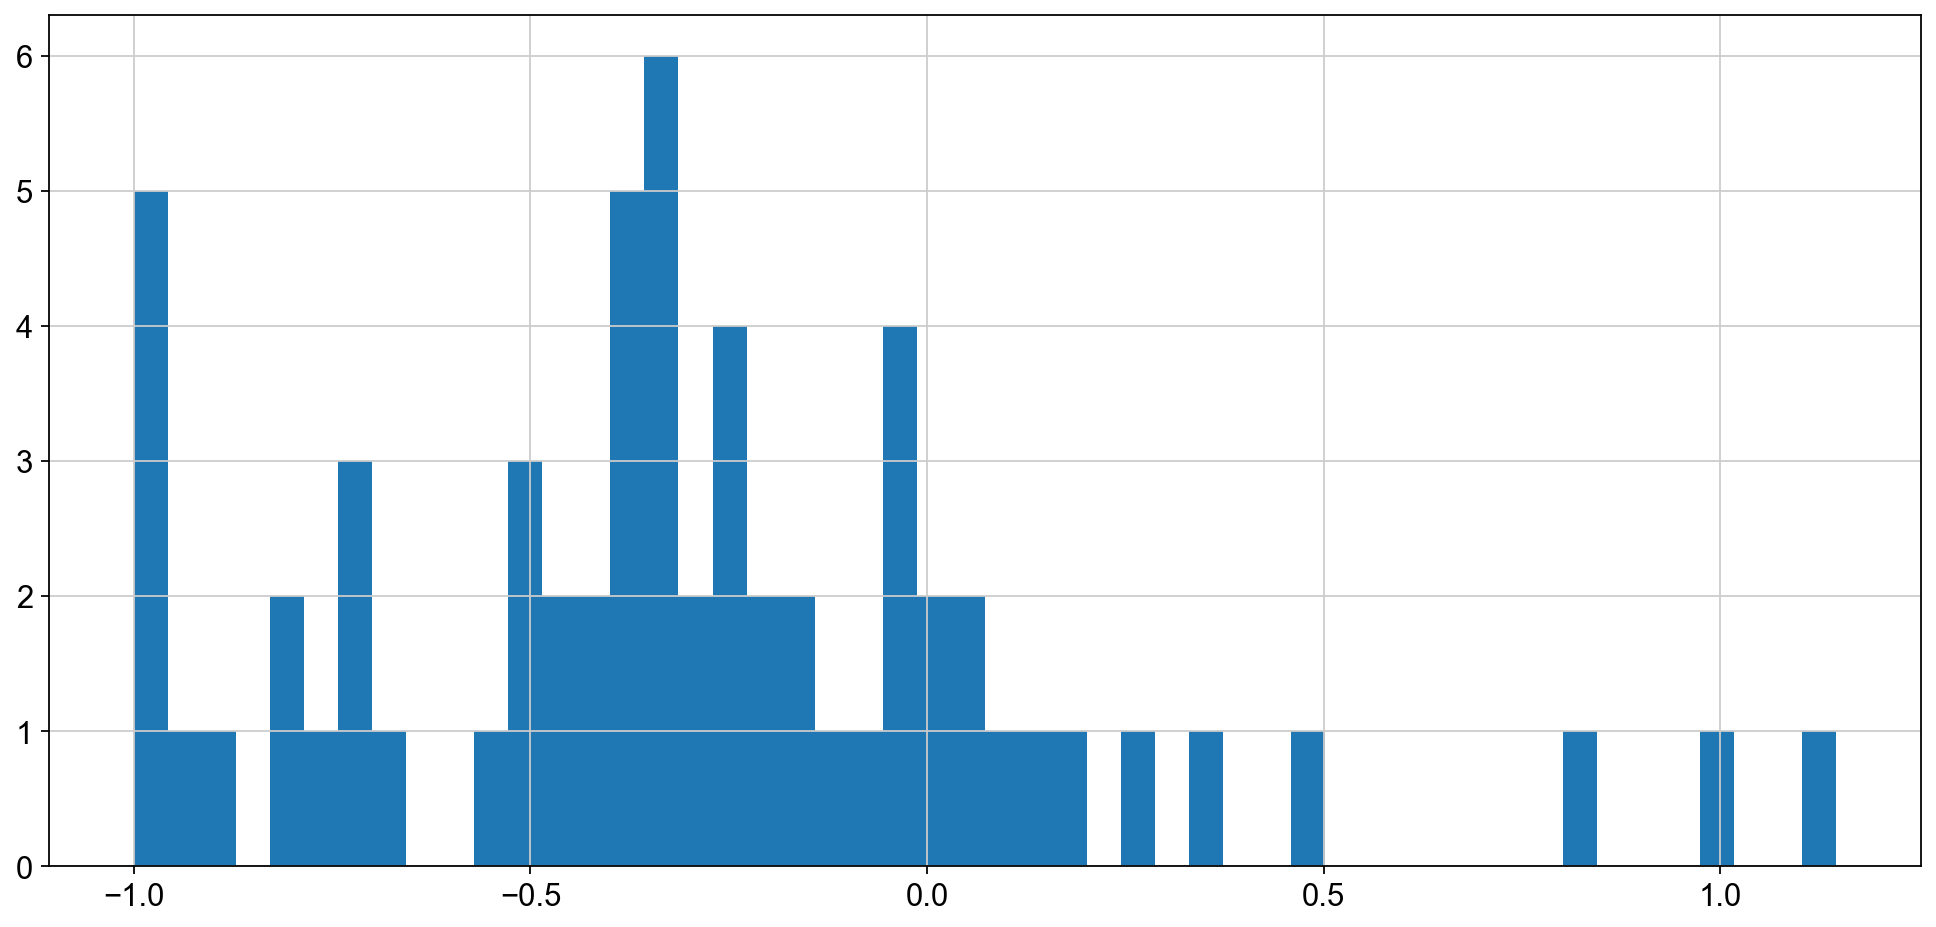

In [157]:
# relative effect with outlier Id3 removed
effect[effect["gene"]!= "Id3"]['rel_effect'].hist(bins=50, figsize=(15, 7))